# About Jupyter Notebooks
This Jupyter Notebook is an interactive computing tool that allows for authors and users to write text, use multimedia images and videos, and create executable codeblocks in a modular, shareable environment.

Today we'll use it to explore the examples provided during the workshop. If you're interested in continuing to explore after the workshop, here are a few recommendations:

1. Check to see if you can install Jupyter or Visual Studio Code on your local machine, which allows you to work with Python notebooks such as this one.
2. Check to see if you have access to Google Colab, which is a Google-fied version of Jupyter that is integrated with GSuite and Google Drive.
3. Explore other online resources for Jupyter-like computing, such as Kaggle, Amazon Web Services "SageMaker" or Microsoft Azure.
4. STEM@GTRI offers Jupyter computing resources for free to schools as part of our Direct to Discovery program, a remote learning program focused on connecting classrooms of STEM subjects with the resources and expertise of the Georgia Tech Research Institute. If you are interested and would like to learn more, email Tyler Kinner at tyler.kinner@gtri.gatech.edu


## About this notebook

This notebook is borrowed from Charles J. Weiss' open-source textbook for teaching scientific computing to chemistry students with Python and Jupyter Notebooks. 

DOI: https://doi.org/10.1021/acs.jchemed.0c01071 

The full textbook is available at: https://github.com/weisscharlesj/SciCompforChemists 

NB: This borrowed chapter is one of the last chapters in the textbook, and earlier chapters do well to teach students foundational Python syntax, concepts, and tools. 

## Chapter Excerpt:
#### About ML: 
*Machine learning* occurs when a program exhibits behavior that is not explicitly programmed but rather is “learned” from data. This definition may seem somewhat unsatisfying because it is so broad that it is vague and only mildly informative. Perhaps a better way of explaining machine learning is through an example. In [section 12.1](12.1), we are faced with the challenge of writing a program that can accurately predict the boiling point of simple alcohols when provided with information about the alcohols such as the molecular weight, number of carbon atoms, degree, etc... These pieces of information about each alcohol are known as *features* while the answer we aim to predict (i.e., boiling point) is the *target*. How can each feature be used to predict the target? To generate a program for predicting boiling points, we would need to pour over the data to see how each feature affects the boiling point. Next, we would need to write a script that somehow uses these trends to calculate the boiling points of alcohols we have never seen. This probably appears like a daunting task. Instead, we can use machine learning to solve this task by allowing the machine learning algorithms to figure out how to use the data and make predictions. Simply provide the machine learning algorithm with the features and targets on a number of alcohols and allow the machine learning algorithm to quantify the trends and develop a function to predict the boiling point of alcohols. In simple situations, this entire task can be completed in just a few minutes!
The sections in this chapter are broken down by types of machine learning. There are three major branches of machine learning: supervised, unsupervised, and reinforcement learning. This chapter will focus on the first two, which are the most applicable to chemistry and data science, while the latter relates more to robotics and is not as commonly employed in chemistry.

#### About scikit-learn:

There are multiple machine learning libraries for Python, but one of the most common, general-purpose machine learning libraries is scikit-learn. This library is simple to use, offers a wide array of common machine learning algorithms, and is installed by default with Anaconda. As you advance in machine learning, you may find it necessary to branch out to other libraries, but you will probably find that scikit-learn does almost everything you need it to do during your first year or two of using machine learning. In addition, scikit-learn includes functions for preprocessing data and evaluating the effectiveness of models.

The scikit-learn library is abbreviated `sklearn` during imports. Each module needs to be imported individually, so you will see them imported throughout this chapter. We will be working with data and visualizing our results, so we will also be utilizing pandas, NumPy, and matplotlib. This chapter assumes the following imports.

*Supervised learning* is where the machine learning algorithms are provided with both feature and target information with the goal of developing a model to predict targets based on the features. When the supervised machine learning predictions are looking to categorize an item like a photo or type of metal complex, it is known as *classification*; and when the predictions are seeking a numerical value from a continuous range, it is a *regression* problem. Some machine learning algorithms are designed for only classification or only regression while others can do either.

The file titled *ROH_data.csv* contains information on over seventy simple alcohols (i.e., a single -OH with no other non-hydrocarbon function groups) including their boiling points. Our goal is to generate a function or algorithm to predict the boiling points of the alcohols based on the information on the alcohols, so here the target is the boiling point and features are the other information about the alcohols.

### Step One: Importing libraries

Like our first notebook, we will make use of some abstracted Python through libraries. We'll use the same big three libraries as before: pandas, numpy, and matplotlib. 

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [28]:
ROH = pd.read_csv('./ROH_data.csv', sep=',')
print(ROH)

     bp      MW  carbons  degree  aliphatic  avg_aryl_position  cyclic
0   338   32.04        1       1          1                0.0       0
1   351   46.07        2       1          1                0.0       0
2   371   60.10        3       1          1                0.0       0
3   356   60.10        3       2          1                0.0       0
4   391   74.12        4       1          1                0.0       0
..  ...     ...      ...     ...        ...                ...     ...
67  435  100.15        6       2          1                0.0       1
68  438  114.19        7       2          0                0.0       1
69  445  114.19        7       2          0                0.0       1
70  436  114.19        7       2          0                0.0       1
71  412   86.13        5       2          1                0.0       1

[72 rows x 7 columns]


#### About the dataset
The dataset is comprised of 72 entries, each with: 
- the boiling point of the alcohol
- the molecular weight of the alcohol
- the number of carbons
- information on the structure, including if it is a chain or a ring and if it is branched or in a straight-line formation, as well as how many carbons are bonded to the carbon in the C-OH alkyl group.

All of the information is coded numerically, so values that would otherwise be labelled "yes/no or true/false" are coded as 1's and 0's, respectively. 

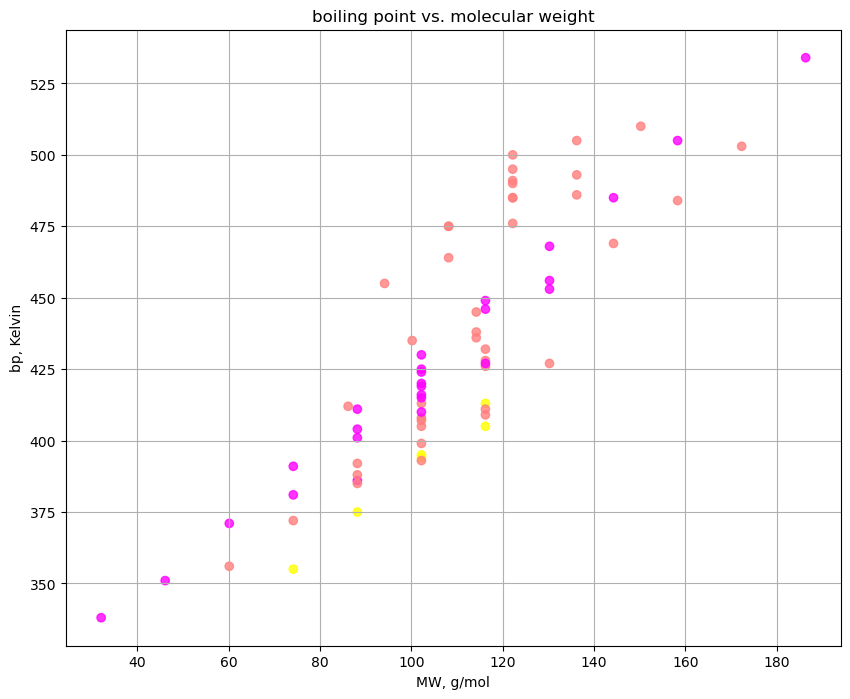

In [38]:
# initialize a plot with size of with a size ratio of 10:8 and 100 dots per inch (resolution)
plt.figure(figsize=(10, 8), dpi=100)

plt.title('boiling point vs. molecular weight') ##title of the plot

plt.scatter(ROH['MW'], ROH['bp'], alpha=0.8, c=ROH['degree'], cmap='spring')
plt.xlabel('MW, g/mol')
plt.ylabel('bp, Kelvin')
plt.grid(True, which='both')  # show or hide grid
cbar = plt.colorbar()
cbar.set_label('Degree')

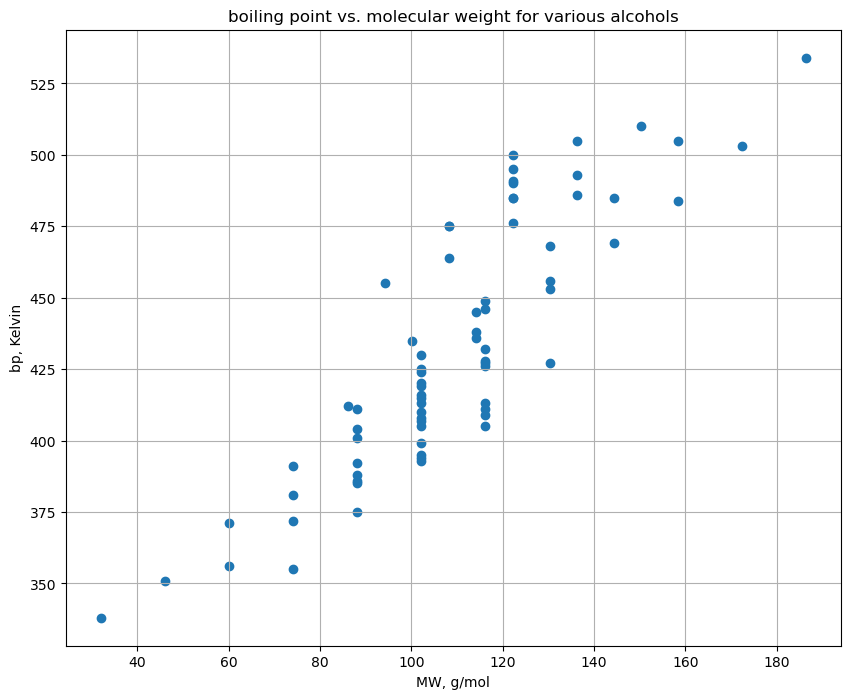

In [40]:
# initialize a plot with size of with a size ratio of 10:8 and 100 dots per inch (resolution)
plt.figure(figsize=(10, 8), dpi=100)

plt.title('boiling point vs. molecular weight for various alcohols') ##title of the plot

plt.scatter(ROH['MW'], ROH['bp'])
plt.xlabel('MW, g/mol')
plt.ylabel('bp, Kelvin')
plt.grid(True, which='both')  # show or hide grid

##### How does this relate?
You have likely done lab experiments to illustrate the concept of intermolecular forces, such as melting point point determinations. This takes these labs a step further into the chemistry and explores concepts that are related to intermolecular forces beyond electronegativity and molecular weight, as well as engages students in exploring machine learning. 

Whenever training a machine learning model to make predictions, it is important to evaluate the accuracy of the predictions. It is unfair to test an algorithm on data it has already seen, so before training a model, first split the data set into a training subset and testing subset. It is also important to shuffle the data set before splitting it as many data sets are at least partially ordered. The alcohol data set is roughly in order of molecular weight, so if an algorithm is trained on the first three-quarters of the data set and then tested on the last quarter, training occurs on smaller alcohols and testing on larger alcohols. This could result in poorer predictions as the machine learning algorithm is not familiar with the trends of larger alcohols. The good news is that scikit-learn provides a built-in function for shuffling and splitting the data set known as `train_test_split()`. The arguments are the features, target, and the fraction of the data set to be used for testing. Below, a quarter of the data set is allotted for testing(`test_size=0.25`).


In [30]:
from sklearn.model_selection import train_test_split


In [31]:
target = ROH['bp']
features = ROH[[ 'MW', 'carbons', 'degree', 'aliphatic', 
                'avg_aryl_position','cyclic']]

In [32]:
X_train, X_test, y_train, y_test =train_test_split(features, target, 
                                                   test_size=0.25, random_state=18)

The output includes four values containing the training/testing features and targets. By convention, `X` contains the features and `y` are the target values because they are the independent and dependent variables, respectively; and the features variable is capitalized because it contains multiple values per alcohol.

In [33]:
from sklearn import linear_model

In [34]:
reg = linear_model.LinearRegression()


In [35]:
reg.fit(X_train, y_train)

LinearRegression()

In [36]:
prediction = reg.predict(X_test)
prediction


array([521.94389573, 439.60028899, 421.38488633, 485.6143471 ,
       355.07207513, 444.98911542, 439.60028899, 487.61879909,
       488.64633926, 497.31838329, 388.22848073, 406.39325504,
       424.6086577 , 444.98911542, 485.56371876, 439.60028899,
       503.77912142, 409.61702641])

Text(0, 0.5, 'True bp, K')

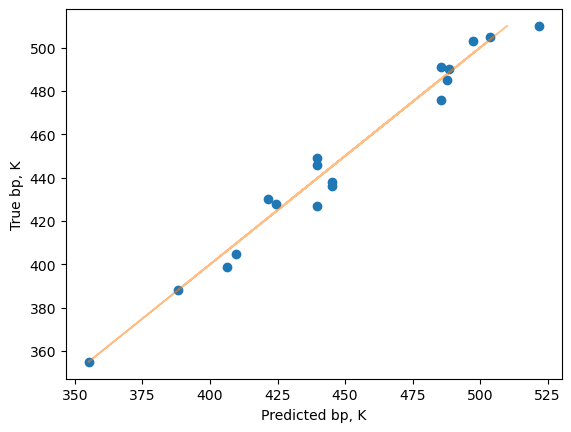

In [37]:
plt.plot(prediction, y_test, 'o')
plt.plot(y_test, y_test, '-', lw=1.3, alpha=0.5)
plt.xlabel('Predicted bp, K')
plt.ylabel('True bp, K')


### 12.1.4 Model Evaluation

It is important to evaluate the effectiveness of trained machine learning models before rolling them out for widespread use, and scikit-learn provides multiple built-in functions to help in this task. The first is the `score()` method. Instead of making predictions using the testing features and then plotting the predictions against the known values, the `score()` method takes in the testing features and target values and returns the $r^2$. The closer the $r^2$ value is to 1, the better the predictions are.

In [ ]:
reg.score(X_test, y_test)


```{index} k-fold cross validation
```

Another tool for evaluating the efficacy of a machine learning algorithm is *k-fold cross-validation*. The prediction results will vary depending upon how the data set is randomly split into training and testing data. *K*-fold cross-validation compensates for this randomness by splitting the entire data set into *k* (*k* being some number) chunks called *folds*. It then reserves one fold as the testing fold and trains the algorithm on the rest. The algorithm is tested using the testing fold and the process is repeated with a different fold reserved for testing (Figure 1). Each iteration trains a fresh algorithm, so it does not remember anything from the previous train/test iteration. The results for each iteration are provided at the end of this process.

A demonstration of *k*-fold cross validation is show below. First, a cross-validation generator is created using the `ShuffleSplit()` function. This function shuffles the data to avoid having all similar alcohols in any particular fold. The linear model is then provided to the `cross_val_score()` function along with the feature and target data and the cross- validation generator.

In [ ]:
from sklearn.model_selection import cross_val_score, ShuffleSplit


In [ ]:
splitter = ShuffleSplit(n_splits=5)


In [ ]:
reg = linear_model.LinearRegression()


In [ ]:
scores = cross_val_score(reg, features, target, cv=splitter)
scores


The scores are the $r^2$ values for each iteration. The average $r^2$ is a pretty reasonable assessment of the efficacy of the model and can be found through the `mean()` function.

In [ ]:
scores.mean()


### Linear Models and Coefficients

Recall that the linear model calculates the boiling point based on a weighted sum of the features, so it can be informative to know the weights to see which features are the most influential in making the predictions. The `LinearRegression()` method contains the attribute `coef_` which provides these coefficients in a NumPy array.

In [ ]:
reg = linear_model.LinearRegression()
reg.fit(X_train, y_train)
reg.coef_


These coefficients correspond to molecular weight, number of carbons, degree, whether or not it is aliphatic, average aryl position, and whether or not it is cyclic, respectively. While some coefficients are larger than others, we cannot yet distinguish which features are more important than the others because the values for each feature occur in different ranges. This is because the coefficients are not only proportional to the predictive value of a feature but also inversely proportional to the magnitude of feature values. For example, while the molecular mass has greater predictive value than the degree, the degree has a larger coefficient because it occurs in a smaller range (1 $\rightarrow$ 3) than the molecular weights (32.04 $\rightarrow$ 186.33 g/mol).

To address this issue, the scikit-learn `sklearn.preprocess` module provides a selection of functions for scaling the features to the same range. Three common feature scaling functions are described in Table 1, but others are detailed on the scikit-learn website.

**Table 1** Preprocessing Data Scaling Functions

| Scaler | Description |
| :----: | :---------  |
|`MinMaxScaler` | Scales the features to a designated range; defaults to \[0, 1\] |
|`StandardScaler` | Centers the features around zero and scales them to a variance of one |
| `RobustScaler` | Centers the features around zero using the median and sets the range using the quartiles; similar to StandardScaler except less affected by outliers|

For this data, we will use the `MinMaxScaler()` with the default scaling of values from 0 $\rightarrow$ 1. This process parallels the fit/predict procedure above except that instead of predicting the target, the algorithm transforms it. That is, first the algorithm learns about the data using the `fit()` method followed by scaling the data using the `transform()` method. Once the scaling model is trained, it can be used to scale any new data by the same amount as the original data.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(features)
scaled_features = scaler.transform(features)


With the features now scaled, we can proceed through training the linear regression model as we have done previously and examine the coefficients.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features, target)


In [ ]:
reg = linear_model.LinearRegression()
reg.fit(X_train, y_train)


In [ ]:
reg.coef_


It is quite clear from the coefficients that the molecular weight and number of carbons are both by far the most important features to predicting the boiling points of alcohols. This makes chemical sense being that larger molecules have greater London dispersion forces thus increasing the boiling points.